In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#Load the dataset
df = pd.read_csv('C:/Users/Siddhartha/Downloads/diabetes_dataset.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Zero_not_acepted = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

for column in Zero_not_acepted:
    df[column] = df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN, mean)

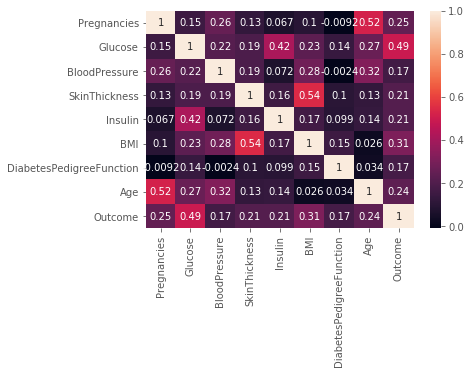

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [6]:

X = df.iloc[:,0:8]
y = df.iloc[:,8]
#the proportion of labels should remain same in the splits, so we use "stratify"
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [7]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB


In [8]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)



GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
#Predict Output 
predicted= model.predict([[1,140,33,32,168,40,0.543,35]])
print (predicted)

[0]


In [10]:
#Predict on test data
y_pred= model.predict(X_test)



In [11]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [12]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred)
cm

array([[119,  31],
       [ 33,  48]], dtype=int64)

In [13]:

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6
0.7229437229437229
